# First Deep Learning Project in Python with Keras

The steps we are going to cover:
1. Load Data.
2. Define Keras Model.
3. Compile Keras Model.
4. Fit Keras Model.
5. Evaluate Keras Model.
6. Put It All Together.
7. Make Predictions

## Load Data
    

Download the dataset and place it in your local working directory, the same location as your python file. Take a look at the dataset:

In [1]:
import pandas as pd
df = pd.read_csv('./housepricedata.csv')

Here, you can explore the data a little. We have our input features in the first ten columns:

- Lot Area (in sq ft)
- Overall Quality (scale from 1 to 10)
- Overall Condition (scale from 1 to 10)
- Total Basement Area (in sq ft)
- Number of Full Bathrooms
- Number of Half Bathrooms
- Number of Bedrooms above ground
- Total Number of Rooms above ground
- Number of Fireplaces
- Garage Area (in sq ft)

In our last column, we have the feature that we would like to predict:
- Is the house price above the median or not? (1 for yes and 0 for no)

Which task are we going to train the neural network for (regression, classification, other...) ?

In [2]:
# Your answer here : # Your answer here : binary classification
##because we want to predict whether the house price is above the median (1 for yes)
##or not (0 for no). Binary classification involves assigning each input instance to one of two classes, 
##and in my case, the classes are "above median" and "not above median."

Now that we’ve seen what our data looks like, we want to convert it into arrays for our machine to process:

In [3]:
dataset = df.values

Split the dataset into input features (X) and the feature we wish to predict (Y). To do that split, assign the first 10 columns of our array to a variable called X and the last column of our array to a variable called Y

In [4]:
X = dataset[:,0:10]
y = dataset[:,10]

Now, we want to split our dataset into a training set, a validation set and a test set. These are the dimensions you need to get for your train, validation and test datasets: (1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)

We will use the code from scikit-learn called ‘train_test_split’, which as the name suggests, split our dataset into a training set and a test set. We first import the code we need:

In [5]:
# splitting into train and test
# splitting into train and test
from sklearn.model_selection import train_test_split

# Split the dataset into training (80%) and temporary set (20%)
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.18, random_state=42)

# Further split the temporary set into validation and actual test set 
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.13, random_state=42)

# Display the dimensions of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1041, 10)
X_val shape: (156, 10)
X_test shape: (263, 10)
y_train shape: (1041,)
y_val shape: (156,)
y_test shape: (263,)


Unfortunately, this function only helps us split our dataset into two. Since we want a separate validation set and test set, we can use the same function to do the split again on val_and_test:

In [ ]:
# splitting into validation and test


Feature scaling will help us see all the variables from the same scale, it will also help our models learn faster

In [6]:
# scaling
# scaling
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and validation sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## Define Keras Model.

The first thing we have to do is to set up the architecture. Let’s first think about what kind of neural network architecture we want. Suppose we want this neural network:
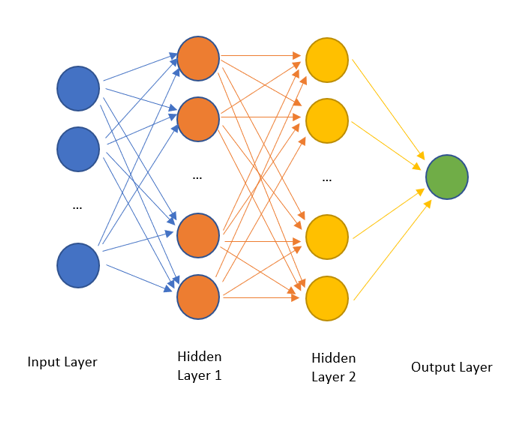
In words, we want to have these layers:

- Hidden layer 1: 12 neurons, ReLU activation
- Hidden layer 2: 16 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation
    
Now, we need to describe this architecture to Keras. We will be using the Sequential model, which means that we merely need to describe the layers above in sequence.

In [7]:
# Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense

# define model
# Initialize the Sequential model
model = Sequential()

# Add the first hidden layer with 12 neurons and ReLU activation
model.add(Dense(12, input_shape=(10,), activation='relu'))

# Add the second hidden layer with 16 neurons and ReLU activation
model.add(Dense(16, activation='relu'))

# Add the output layer with 1 neuron and Sigmoid activation (for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Print the model summary to see the architecture and parameters
model.summary()

2023-12-15 16:35:07.275151: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-15 16:35:07.275200: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-15 16:35:07.277806: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-15 16:35:07.290753: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-15 16:35:09.087519: W tensorflow/comp

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                132       
                                                                 
 dense_1 (Dense)             (None, 16)                208       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 357 (1.39 KB)
Trainable params: 357 (1.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2023-12-15 16:35:15.550185: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4056 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1660, pci bus id: 0000:61:00.0, compute capability: 7.5


Now that the model is defined, we can compile it.

Compiling the model uses TensorFlow that chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU or GPU or even distributed.

In [8]:
# compile model
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

We have defined our model and compiled it ready for efficient computation.

Now it is time to execute the model on some data (use 100 iterations and 32 batch size).

In [9]:
# train model
# Fit the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val_scaled, y_val)
)

Epoch 1/100


2023-12-15 16:57:18.252305: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-15 16:57:19.266608: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f8e7002ff50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-15 16:57:19.266646: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1660, Compute Capability 7.5
2023-12-15 16:57:20.169690: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1702655840.295103   66833 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


33/33 [==============================] - 6s 13ms/step - loss: 0.2615 - accuracy: 0.5130 - val_loss: 0.2545 - val_accuracy: 0.5705
Epoch 2/100
33/33 [==============================] - 0s 6ms/step - loss: 0.2509 - accuracy: 0.5629 - val_loss: 0.2451 - val_accuracy: 0.5897
Epoch 3/100
33/33 [==============================] - 0s 5ms/step - loss: 0.2416 - accuracy: 0.6119 - val_loss: 0.2364 - val_accuracy: 0.6154
Epoch 4/100
33/33 [==============================] - 0s 6ms/step - loss: 0.2331 - accuracy: 0.6455 - val_loss: 0.2281 - val_accuracy: 0.6474
Epoch 5/100
33/33 [==============================] - 0s 6ms/step - loss: 0.2252 - accuracy: 0.6686 - val_loss: 0.2204 - val_accuracy: 0.6795
Epoch 6/100
33/33 [==============================] - 0s 5ms/step - loss: 0.2176 - accuracy: 0.6984 - val_loss: 0.2130 - val_accuracy: 0.6987
Epoch 7/100
33/33 [==============================] - 0s 5ms/step - loss: 0.2104 - accuracy: 0.7214 - val_loss: 0.2058 - val_accuracy: 0.7179
Epoch 8/100
33/33 [=====

In [11]:
# predict on validation set
# Make predictions on the validation set
predictions = model.predict(X_val_scaled)



1/5 [=====>........................] - ETA: 0s

5/5 [==============================] - 0s 3ms/step


In [12]:
# calculate accuracy on validation set
from sklearn.metrics import accuracy_score

# Assuming y_val is your true labels for the validation set

# Convert probabilities to binary predictions using a threshold of 0.5
binary_predictions = (predictions > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_val, binary_predictions)

print("Validation Set Accuracy:", accuracy)


Validation Set Accuracy: 0.9423076923076923


We have trained our model, which gives us a correct accuracy. But we haven't used our validation set properly, and our test set at all. Let's correct that.

In [ ]:
# train model
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val_scaled, y_val)
)

In [13]:
# predict on TEST set
predictions_val = model.predict(X_val_scaled)
binary_predictions_val = (predictions_val > 0.5).astype(int)

accuracy_val = accuracy_score(y_val, binary_predictions_val)
print("Validation Set Accuracy:", accuracy_val)
predictions_test = model.predict(X_test_scaled)
binary_predictions_test = (predictions_test > 0.5).astype(int)

# calculate accuracy on test set
accuracy_test = accuracy_score(y_test, binary_predictions_test)
print("Test Set Accuracy:", accuracy_test)


5/5 [==============================] - 0s 3ms/step
Validation Set Accuracy: 0.9423076923076923
9/9 [==============================] - 0s 5ms/step
Test Set Accuracy: 0.9201520912547528


Visualize training and validation losses and accuracies plots with the help of keras

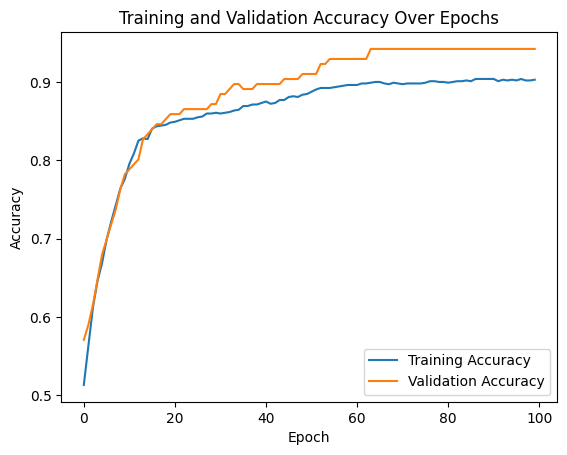

In [14]:
# visualize training and validation accuracies
import matplotlib.pyplot as plt
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()

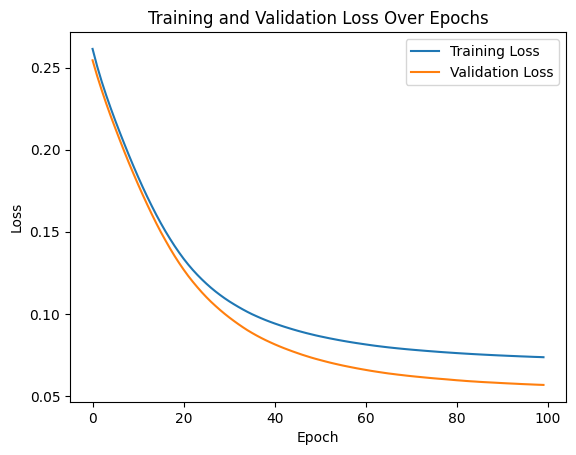

In [15]:
# visualize training and validation losses
# Plot training and validation losses
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()


We have trained our neural network on the entire dataset and we can evaluate the performance of the network on the same dataset. A list of most hyperparameters available keras: 

https://keras.io/api/layers/initializers/

https://keras.io/api/layers/activations/

https://keras.io/api/losses/

https://keras.io/api/optimizers/